# Studi Kasus : Clustering Data dengan Dataset Iris dengan menggunakan Algoritma DBSCAN

# 1. Memanggil Library

In [1]:
# Memanggil library yang dibutuhkan
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# 2. Memanggil dataset
### Memanggil dataset IRIS, Kita juga bisa melihat methods dan features dalam dataset tersebut.

In [3]:
# Memanggil dataset IRIS
bunga = datasets.load_iris()

# Melihat methods dalam dataset
print(dir(bunga))

# Melihat features dalam dataset
print(bunga.feature_names)


['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## Untuk melihat target di dalam dataset:

In [4]:
# Nama Target
print(bunga.target_names)

['setosa' 'versicolor' 'virginica']


# 3. Visualisasi data dengan Scatter Plot

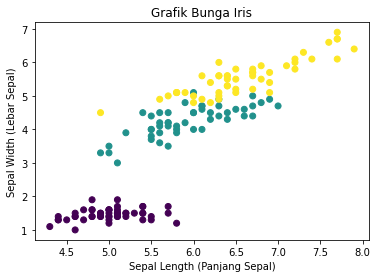

In [7]:
# Membagi data untuk sumbu x dan sumbu y
x_axis = bunga.data[:, 0] # Sepal Length / Panjang Sepal
y_axis = bunga.data[:, 2] # Sepal Width / Lebar Sepal

# Menampilkan data
plt.scatter(x_axis, y_axis, c = bunga.target)
plt.xlabel("Sepal Length (Panjang Sepal)")
plt.ylabel("Sepal Width (Lebar Sepal)")
plt.title("Grafik Bunga Iris")
plt.show()

# 4.  Mengaktifkan DBSCAN dengan Sklearn
## Langkah selanjutnya melakukan perintah untuk model DBSCAN dengan melkaukan fitting data.

In [10]:
# Melakukan Model DBSCAN
dbscan = DBSCAN()
# Fitting data
dbscan.fit(bunga.data)

# Transformasikan menggunakan PCA 2 D
pca = PCA(n_components=2).fit(bunga.data)
pca_2d = pca.transform(bunga.data)

# 5. Visualisasi Hasil
## Untuk Menampilkan scatter plot dari data-data setelah dilakukan klasterisasi oleh Algoritma DBSCAN.

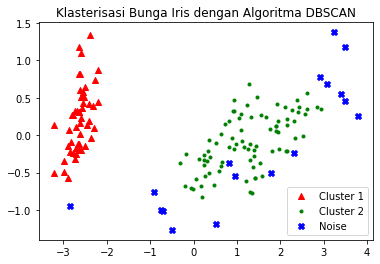

In [13]:
# Visualisasi dengan scatter plot

# Memberi label marker
label = {0: 'red', 1: 'blue', 2: 'green'}

for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        cluster1 = plt.scatter(pca_2d[i, 0],
                               pca_2d[i, 1],
                               c='r',
                               marker='^')
    elif dbscan.labels_[i] == 1:
        cluster2 = plt.scatter(pca_2d[i, 0],
                               pca_2d[i, 1],
                               c='g',
                               marker='.')
    elif dbscan.labels_[i] == -1:
        noise = plt.scatter(pca_2d[i, 0],
                            pca_2d[i, 1],
                            c='b',
                            marker='X')

# Memberi legend dan judul
plt.legend([cluster1, cluster2, noise],
           ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('Klasterisasi Bunga Iris dengan Algoritma DBSCAN')

# Menampilkan Hasil Visualisasi
plt.show()
